In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import spacy
import time

from skmultilearn.model_selection import iterative_train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import AdaBoostClassifier   # Ensamble AdaBoost para regresion
from sklearn.ensemble import GradientBoostingClassifier   # Ensamble Gradient Boosting para regresion
from sklearn.ensemble import RandomForestClassifier   # Ensamble RandomForest para regresion
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier    # Ensamble ExtraTrees para regresion
from xgboost import XGBClassifier as xgbc

from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, Perceptron # para usar modelos de regresion logistica  
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn 
from sklearn.svm import SVC

color = sns.color_palette()
sns.set_style('white')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [22]:
data_suicidios_modelo = pd.read_csv("data_suicidios_modelo.csv", encoding="utf-8")
data_suicidios_modelo.head()

,CAUSAS,CAUSA1,CAUSA2,CAUSA3,MODALIDAD
0,ASFIXIA MECANICA AHORCAMIENTO,ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
1,AHORCAMIENTO ESPERA RESULTADO,ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
2,ASFIXIA AHORCAMIENTO,ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
3,INFARTO CARDIACO HEMORRAGIA AGUDA SECCION VENA...,TRAUMA FISICO,OTRO,OTRO,ARMA BLANCA
4,ASFIXIA MECANICA AHORCAMIENTO,ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO


In [23]:
data_suicidios_modelo.head()
data_suicidios_modelo = pd.get_dummies(data_suicidios_modelo, columns=["CAUSA1", "CAUSA2", "CAUSA3", "MODALIDAD"])

for col in data_suicidios_modelo.columns:
    if data_suicidios_modelo[col].dtype == bool:
        data_suicidios_modelo[col]=data_suicidios_modelo[col].astype(int)

In [24]:
X = data_suicidios_modelo.iloc[:,0].values.reshape(-1, 1)
y = data_suicidios_modelo.iloc[:,1:].values
print(X.shape)
print(y.shape)

(3925, 1)
(3925, 31)


In [25]:
X_train, y_train, X_test, y_test = iterative_train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3139, 1) (786, 1) (3139, 31) (786, 31)


In [26]:
vectorizer = TfidfVectorizer()
X_train_list = [''.join(x) for x in X_train]
X_test_list = [''.join(x) for x in X_test]
X_train_tfid = vectorizer.fit_transform(X_train_list)
X_test_tfid = vectorizer.transform(X_test_list)
print(X_train_tfid.shape)
print(X_test_tfid.shape)

(3139, 874)
(786, 874)


In [155]:
algos = []
algos.append(('LR', OneVsRestClassifier(LogisticRegression())))
algos.append(('SVM', OneVsRestClassifier(SVC())))
algos.append(('AdaBoost', OneVsRestClassifier(AdaBoostClassifier())))
algos.append(('GradientBoosting', OneVsRestClassifier(GradientBoostingClassifier())))
algos.append(('RandomForest', OneVsRestClassifier(RandomForestClassifier())))
algos.append(('ExtraTrees', OneVsRestClassifier(ExtraTreesClassifier())))
algos.append(('Ridge', OneVsRestClassifier(RidgeClassifierCV())))
algos.append(('Perceptron', OneVsRestClassifier(Perceptron())))
algos.append(('Xgbc', OneVsRestClassifier(xgbc())))

In [156]:
"""# Evaluamos cada algoritmo en estrategia de 10-fold-CV
results = []
names = []
row_index = 0
# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 10   
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Score']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#  evalua cada algoritmo
for algoname, algo in algos:
    MLA_compare.loc[row_index, 'MLA Name'] = algoname
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(algo.get_params())
    cv_results = cross_val_score(algo, X_train_tfid, y_train, cv=kfold, scoring='accuracy') # dado que son clases balanceadas usamos accuracy
    MLA_compare.loc[row_index, 'MLA Score'] = cv_results.mean()
    MLA_compare.loc[row_index, 'MLA Std'] = cv_results.std()
    results.append(cv_results)
    names.append(algoname)
    row_index+=1"""

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWarning: Label not 10 is present in all training examples.
  warnings.warn(
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\multiclass.py:84: UserWa

In [157]:
"""pd.set_option("display.max_colwidth", None)
MLA_compare"""

,MLA Name,MLA Parameters,MLA Score,MLA Std
0,LR,"{'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': None, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(), 'n_jobs': None, 'verbose': 0}",0.617,0.028
1,SVM,"{'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(), 'n_jobs': None, 'verbose': 0}",0.763,0.021
2,AdaBoost,"{'estimator__algorithm': 'SAMME.R', 'estimator__base_estimator': 'deprecated', 'estimator__estimator': None, 'estimator__learning_rate': 1.0, 'estimator__n_estimators': 50, 'estimator__random_state': None, 'estimator': AdaBoostClassifier(), 'n_jobs': None, 'verbose': 0}",0.822,0.020
3,GradientBoosting,"{'estimator__ccp_alpha': 0.0, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'log_loss', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_iter_no_change': None, 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingClassifier(), 'n_jobs': None, 'verbose': 0}",0.818,0.020
4,RandomForest,"{'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': None, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(), 'n_jobs': None, 'verbose': 0}",0.822,0.019
5,ExtraTrees,"{'estimator__bootstrap': False, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'sqrt', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': None, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': ExtraTreesClassifier(), 'n_jobs': None, 'verbose': 0}",0.820,0.024
6,Ridge,"{'estimator__alphas': (0.1, 1.0, 10.0), 'estimator__class_weight': None, 'estimator__cv': None, 'estimator__fit_intercept': True, 'estimator__scoring': None, 'estimator__store_cv_values': False, 'estimator': RidgeClassifierCV(), 'n_jobs': None, 'verbose': 0}",0.630,0.021
7,Perceptron,"{'estimator__alpha': 0.0001, 'estimator__class_weight': None, 'estimator__early_stopping': False, 'estimator__eta0': 1.0, 'estimator__fit_intercept': True, 'estimator__l1_ratio': 0.15

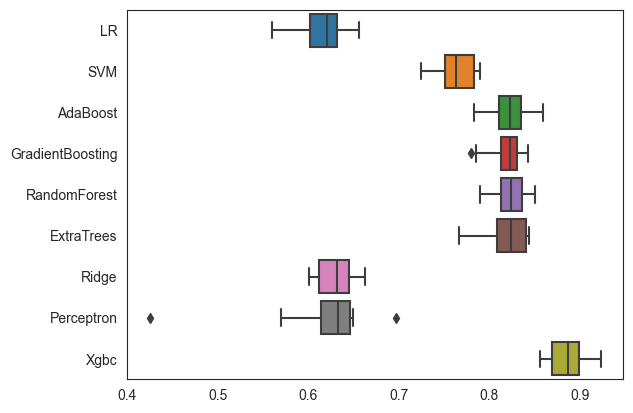

In [158]:
"""ax=sns.boxplot(results, orient="h")
ax.set_yticklabels(names)
plt.show()"""

In [27]:
kfold = KFold(n_splits=10, random_state=10, shuffle= True)

In [31]:
"""param_grid = [
    [{
    #GradientBoostingClassifier
    "estimator__loss":["log_loss"],
    "estimator__learning_rate":[0.1],
    "estimator__n_estimators":[200],
    "estimator__criterion":["friedman_mse"],
    "estimator__max_features":[None]
    }],
    [{
    #RandomForestClassifier
    "estimator__n_estimators":[300],
    "estimator__criterion":["log_loss"],
    "estimator__max_features":[None],
    "estimator__class_weight":["balanced"]
    }],
    [{
    #ExtraTreeClassifier
    "estimator__n_estimators":[200],
    "estimator__criterion":["log_loss"],
    "estimator__max_features":[None],
    "estimator__class_weight":["balanced"]
    }],
    [{
    #XgboostClassifier
    "estimator__learning_rate":[0.1],
    "estimator__n_estimators":[200],
    "estimator__max_depth":[6]
    }]
]

vote_est = [
    ('gbc', OneVsRestClassifier(GradientBoostingClassifier())),
    ("rnc", OneVsRestClassifier(RandomForestClassifier())),
    ("etc", OneVsRestClassifier(ExtraTreesClassifier())),
    ("xgb", OneVsRestClassifier(xgbc()))
    ]"""

In [32]:
"""vote_alg = {}
start_total = time.perf_counter()
for clf, param in zip(vote_est, param_grid):
    start = time.perf_counter()        
    best_search = GridSearchCV(estimator = clf[1], param_grid = param, cv = kfold, scoring = 'accuracy')
    best_search.fit(X_train_tfid, y_train)
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    best_score = best_search.best_score_
    vote_alg[clf[1].__class__.__name__]=best_search.best_estimator_
    print('The best parameter for {} is {} with a runtime of {:.3f} seconds, score {:.3f}'.format(clf[1].__class__.__name__, best_param, run, best_score))
    clf[1].set_params(**best_param) 

run_total = time.perf_counter() - start_total
print('Total optimization time was {:.3f} minutes.'.format(run_total/60))

print('-'*10)"""

The best parameter for OneVsRestClassifier is {'estimator__criterion': 'friedman_mse', 'estimator__learning_rate': 0.1, 'estimator__loss': 'log_loss', 'estimator__max_features': None, 'estimator__n_estimators': 200} with a runtime of 4219.275 seconds, score 0.829
The best parameter for OneVsRestClassifier is {'estimator__class_weight': 'balanced', 'estimator__criterion': 'log_loss', 'estimator__max_features': None, 'estimator__n_estimators': 200} with a runtime of 4535.683 seconds, score 0.879
The best parameter for OneVsRestClassifier is {'estimator__class_weight': 'balanced', 'estimator__criterion': 'log_loss', 'estimator__max_features': None, 'estimator__n_estimators': 200} with a runtime of 2919.860 seconds, score 0.909
The best parameter for OneVsRestClassifier is {'estimator__learning_rate': 0.1, 'estimator__max_depth': 6, 'estimator__n_estimators': 200} with a runtime of 169.142 seconds, score 0.890
Total optimization time was 197.400 minutes.
----------


In [72]:
gb_classifier = MultiOutputClassifier(GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=200, criterion='friedman_mse', max_features=None))
rf_classifier = MultiOutputClassifier(RandomForestClassifier(n_estimators=200, criterion='log_loss', max_features=None, class_weight='balanced'))
et_classifier = MultiOutputClassifier(ExtraTreesClassifier(n_estimators=200, criterion='log_loss', max_features=None, class_weight='balanced'))
xgb_classifier = MultiOutputClassifier(xgbc(learning_rate=0.1, n_estimators=200, max_depth=6))

In [156]:
"""grid_vote = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('et', et_classifier),
    ('xgb', xgb_classifier)
], voting='soft')
grid_vote.fit(X_train_tfid, y_train)"""

"grid_vote = VotingClassifier(estimators=[\n    ('rf', rf_classifier),\n    ('gb', gb_classifier),\n    ('et', et_classifier),\n    ('xgb', xgb_classifier)\n], voting='soft')\ngrid_vote.fit(X_train_tfid, y_train)"

In [157]:
modelo = OneVsRestClassifier(xgbc(estimator__learning_rate = 0.1, estimator__n_estimators=200, estimator__max_depth=6))
modelo.fit(X_train_tfid, y_train)

[12:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

[12:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

[12:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

[12:20:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "estimator__learning_rate", "estima

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            estimator__learning_rate=0.1,
                                            estimator__max_depth=6,
                                            estimator__n_estimators=200,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None, ...))

In [110]:
modelo2= OneVsRestClassifier(xgbc(learning_rate=0.1, n_estimators=300, max_depth=6))
modelo2.fit(X_train_tfid, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))

In [111]:
y_pred = modelo.predict(X_test_tfid)
y_pred2 = modelo2.predict(X_test_tfid)

In [112]:
print(accuracy_score(y_pred, y_test))
print(accuracy_score(y_pred2, y_test))

0.8982188295165394
0.9007633587786259


In [107]:
print(classification_report(y_pred2, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       446
           1       0.86      1.00      0.92         6
           2       0.84      1.00      0.91        16
           3       0.00      0.00      0.00         1
           4       0.99      0.95      0.97        79
           5       0.86      0.86      0.86        35
           6       0.93      0.98      0.95       102
           7       1.00      1.00      1.00        16
           8       0.38      1.00      0.56         5
           9       0.97      0.97      0.97        67
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00        64
          13       0.94      0.89      0.92        57
          14       0.88      0.87      0.87        75
          15       1.00      0.99      0.99        72
          16       0.97      0.97      0.97       516
          17       0.00    

c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
data_final = pd.DataFrame(zip(X_test, y_test, y_pred2), columns=['CAUSAS', 'CAUSA_TEST', 'CAUSA_PRED'])
data_final.head()

,CAUSAS,CAUSA_TEST,CAUSA_PRED
0,[AHORCAMIENTO ESPERA RESULTADO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[ASFIXIA AHORCAMIENTO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[INTOXICACION ORGANOS FOSFORADOS],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[ASFIXIA MECANICA AGENTE CONSTRICTOR EXTERNO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[TRAUMATISMO CRANEO ENCEFALICO],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [148]:
columnas_pred = data_suicidios_modelo.columns[1:].tolist()
print(columnas_pred)

['CAUSA1_ASFIXIA MECANICA', 'CAUSA1_ASFIXIA OTRO', 'CAUSA1_ASFIXIA QUIMICO', 'CAUSA1_ASFIXIA SUMERSION', 'CAUSA1_EDEMA CEREBRAL', 'CAUSA1_EDEMA PULMONAR', 'CAUSA1_EFECTO TOXICO DE UNA SUSTANCIA', 'CAUSA1_INSUFICIENCIA RESPIRATORIA', 'CAUSA1_OTRO', 'CAUSA1_TRAUMA FISICO', 'CAUSA2_ASFIXIA MECANICA', 'CAUSA2_ASFIXIA SUMERSION', 'CAUSA2_EDEMA CEREBRAL', 'CAUSA2_EDEMA PULMONAR', 'CAUSA2_EFECTO TOXICO DE UNA SUSTANCIA', 'CAUSA2_INSUFICIENCIA RESPIRATORIA', 'CAUSA2_OTRO', 'CAUSA2_TRAUMA FISICO', 'CAUSA3_ASFIXIA SUMERSION', 'CAUSA3_EDEMA PULMONAR', 'CAUSA3_EFECTO TOXICO DE UNA SUSTANCIA', 'CAUSA3_INSUFICIENCIA RESPIRATORIA', 'CAUSA3_OTRO', 'CAUSA3_TRAUMA FISICO', 'MODALIDAD_AHOGAMIENTO', 'MODALIDAD_AHORCAMIENTO', 'MODALIDAD_ARMA BLANCA', 'MODALIDAD_ARMA FUEGO', 'MODALIDAD_ENVENENAMIENTO', 'MODALIDAD_OTRO', 'MODALIDAD_PRECIPITACION']


In [153]:
# Create new columns for each element in list1
data_final2={}
for i, col_name in enumerate(columnas_pred):
    data_final[col_name] = [row[i] for row in data_final["CAUSA_PRED"]]

# Drop the original "PRED" column
#data = data.drop("CAUSA_PRED", axis=1)

# Display the modified DataFrame
data_final_dummies = data_final.iloc[:,3:]
data_final = data_final.iloc[:,:3]
data_final

,CAUSAS,CAUSA_TEST,CAUSA_PRED
0,[AHORCAMIENTO ESPERA RESULTADO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,[ASFIXIA AHORCAMIENTO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,[INTOXICACION ORGANOS FOSFORADOS],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,[ASFIXIA MECANICA AGENTE CONSTRICTOR EXTERNO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,[TRAUMATISMO CRANEO ENCEFALICO],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...
781,[EDEMA CEREBRAL EDEMA PULMONAR ASFIXIA BRONCOA...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
782,[INSUFICIENCIA RESPIRATORIA AGUDA ASFIXIA AHOG...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
783,[EDEMA PULMONAR LACERACION ENCEFALO TRAUMATISM...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
784,[EDEMA CEREBRAL EDEMA PULMONAR ASFIXIA MECANIC...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


In [154]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [155]:
df3 = undummify(data_final_dummies)
data_final = pd.concat([data_final, df3], axis=1)
data_final

,CAUSAS,CAUSA_TEST,CAUSA_PRED,CAUSA1,CAUSA2,CAUSA3,MODALIDAD
0,[AHORCAMIENTO ESPERA RESULTADO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
1,[ASFIXIA AHORCAMIENTO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
2,[INTOXICACION ORGANOS FOSFORADOS],"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...",EFECTO TOXICO DE UNA SUSTANCIA,OTRO,OTRO,ENVENENAMIENTO
3,[ASFIXIA MECANICA AGENTE CONSTRICTOR EXTERNO],"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ASFIXIA MECANICA,OTRO,OTRO,AHORCAMIENTO
4,[TRAUMATISMO CRANEO ENCEFALICO],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",TRAUMA FISICO,OTRO,OTRO,OTRO
...,...,...,...,...,...,...,...
781,[EDEMA CEREBRAL EDEMA PULMONAR ASFIXIA BRONCOA...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",ASFIXIA QUIMICO,EDEMA CEREBRAL,ASFIXIA SUMERSION,ENVENENAMIENTO
782,[INSUFICIENCIA RESPIRATORIA AGUDA ASFIXIA AHOG...,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",ASFIXIA MECANICA,INSUFICIENCIA RESPIRATORIA,OTRO,AHOGAMIENTO
783,[EDEMA PULMONAR LACERACION ENCEFALO TRAUMATISM...,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",EDEMA PULMONAR,OTRO,OTRO,ARMA BLANCA
784,[EDEMA CEREBRAL EDEMA PULMONAR ASFIXIA MECANIC...,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...",ASFIXIA QUIMICO,EDEMA CEREBRAL,EDEMA PULMONAR,ENVENENAMIENTO
